In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/MyDrive/Colab Notebooks"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks


# 데이터 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('train_공개.csv', encoding='utf-8')
test_df = pd.read_csv('test_공개.csv', encoding='utf-8')
print("dataset shape: ", train_df.shape)
print("dataset shape: ", test_df.shape)
train_df.head(10)

dataset shape:  (60000, 13)
dataset shape:  (10000, 12)


,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
0,0,18371,2,172,104.0,156,96,1,1,0,0,0,1
1,1,14455,1,164,62.0,110,70,1,1,0,0,1,0
2,2,17533,2,177,86.0,120,80,1,1,0,0,1,0
3,3,16010,2,175,88.0,120,80,1,1,0,0,1,1
4,4,16091,1,165,88.0,130,90,1,1,0,0,0,0
5,5,19010,2,168,76.0,130,90,2,1,1,1,1,0
6,6,16731,1,174,75.0,130,90,1,1,0,0,1,1
7,7,19834,1,162,106.0,110,70,2,3,0,0,1,1
8,8,18041,2,170,109.0,100,60,1,1,1,0,0,0
9,9,23183,2,173,115.0,130,80,1,1,0,0,1,1


In [ ]:
train_df.describe()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,19468.299417,1.349317,164.356983,74.226097,129.134883,96.921717,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,17320.652413,2465.005682,0.476758,8.220935,14.398333,166.156717,193.061880,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,0.000000,10859.000000,1.000000,57.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,29999.500000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,44999.250000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,59999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_df.describe()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,19472.26420,1.351100,164.372700,74.083247,126.911700,94.882600,1.371200,1.223900,0.090400,0.055300,0.799200
std,2886.89568,2480.80598,0.477338,8.145369,14.380400,19.608257,158.161432,0.686336,0.571316,0.286768,0.228576,0.400619
min,0.00000,10798.00000,1.000000,55.000000,22.000000,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2499.75000,17649.75000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,4999.50000,19711.00000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7499.25000,21341.50000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,9999.00000,23701.00000,2.000000,198.000000,180.000000,806.000000,9800.000000,3.000000,3.000000,1.000000,1.000000,1.000000


In [ ]:
# 결손값 확인 -> 없음
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      60000 non-null  int64  
 1   나이      60000 non-null  int64  
 2   성별      60000 non-null  int64  
 3   키       60000 non-null  int64  
 4   몸무게     60000 non-null  float64
 5   수축기 혈압  60000 non-null  int64  
 6   이완기 혈압  60000 non-null  int64  
 7   콜레스테롤   60000 non-null  int64  
 8   포도당     60000 non-null  int64  
 9   흡연      60000 non-null  int64  
 10  음주      60000 non-null  int64  
 11  신체활동    60000 non-null  int64  
 12  label   60000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.0 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   나이      10000 non-null  int64  
 2   성별      10000 non-null  int64  
 3   키       10000 non-null  int64  
 4   몸무게     10000 non-null  float64
 5   수축기 혈압  10000 non-null  int64  
 6   이완기 혈압  10000 non-null  int64  
 7   콜레스테롤   10000 non-null  int64  
 8   포도당     10000 non-null  int64  
 9   흡연      10000 non-null  int64  
 10  음주      10000 non-null  int64  
 11  신체활동    10000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 937.6 KB


In [ ]:
# 불균형 분포가 아님
print(train_df['label'].value_counts())

0    30018
1    29982
Name: label, dtype: int64


# 데이터 전처리

### 데이터 인코딩

레이블 인코딩을 할 경우 일괄적인 숫자 값으로 변환되면서, 숫자의 크고 작음에 대한 특성이 작용하여 예측 성능이 떨어질 수 있다. 피처가 모두 독립적이고, 피처 이름을 제외한 데이터 값이 모두 숫자이다. 따라서 실제 모델에서는 레이블 인코딩을 적용하지 않았다.

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#items = train_df.columns
#encoder = LabelEncoder()
#encoder.fit(items)
#labels = encoder.transform(items)
#print('인코딩 변환값:', labels)
#train_df.columns = labels

인코딩 변환값: [ 0  2  4 10  3  5  8  9 11 12  7  6  1]


### 이상값 처리

세계 보건 기구 (WHO) 기준 적정 혈압은 수축기 혈압 120 미만, 이완기 혈압 80 미만이다. 중증 고혈압 3단계는 수축기 혈압 180 이상, 이완기 혈압 110 이상이다. 이 기준을 토대로, 수축기 혈압은 240 초과, 50 미만인 경우, 이완기 혈압은 190 초과, 30 미만인 경우를 이상치라 정의하였다. 그리고 그 이상치를 각각의 경계값으로 대체하였다. 데이터 자체를 삭제하기에는 데이터가 불필요한 데이터라고 판단하기 이르고, 평균값으로 대체하기에는 이상치 값이 평균값에 이미 영향을 줬기 때문에 이상값을 각각의 경계값으로 대체하였다.

In [ ]:
new = train_df['수축기 혈압']

for i in range (len(new)):
  if new[i]>240:
    new = new.replace(new[i], 240)
  elif new[i]<50:
    new = new.replace(new[i], 50)


new2 = train_df['이완기 혈압']

for i in range (len(new2)):
  if new2[i]>190:
    new2 = new2.replace(new2[i], 190)
  elif new2[i]<30:
    new2 = new2.replace(new2[i], 30)



train_df['수축기 혈압'] = new
train_df['이완기 혈압'] = new2

train_df.describe()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,19468.299417,1.349317,164.356983,74.226097,126.840800,82.816117,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,17320.652413,2465.005682,0.476758,8.220935,14.398333,17.741209,15.959973,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,0.000000,10859.000000,1.000000,57.000000,10.000000,50.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,29999.500000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,44999.250000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,59999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
new = test_df['수축기 혈압']

for i in range (len(new)):
  if new[i]>240:
    new = new.replace(new[i], 240)
  elif new[i]<50:
    new = new.replace(new[i], 50)


new2 = test_df['이완기 혈압']

for i in range (len(new2)):
  if new2[i]>190:
    new2 = new2.replace(new2[i], 190)
  elif new2[i]<30:
    new2 = new2.replace(new2[i], 30)



test_df['수축기 혈압'] = new
test_df['이완기 혈압'] = new2

test_df.describe()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,19472.26420,1.351100,164.372700,74.083247,126.972300,82.842900,1.371200,1.223900,0.090400,0.055300,0.799200
std,2886.89568,2480.80598,0.477338,8.145369,14.380400,17.700369,15.658925,0.686336,0.571316,0.286768,0.228576,0.400619
min,0.00000,10798.00000,1.000000,55.000000,22.000000,50.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2499.75000,17649.75000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,4999.50000,19711.00000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7499.25000,21341.50000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,9999.00000,23701.00000,2.000000,198.000000,180.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000


혈압과 같은 방법으로 키와 몸무게 항목도 이상치를 대체하고 실험을 진행해보았다.
실험 결과 성능이 오히려 떨어지는 양상을 보이고 이론상 가능한 수치이기 때문에 최종 모델에는 적용하지 않았다.

In [ ]:
#new3 = train_df['키']
#
#for i in range (len(new3)):
#  if new3[i]>198:
#    new3 = new3.replace(new3[i], 198)
#  elif new3[i]<100:
#    new3 = new3.replace(new3[i], 100)
#
#
#new4 = train_df['몸무게']
#
#for i in range (len(new4)):
#  if new4[i]>180:
#    new4 = new4.replace(new4[i], 180)
#  elif new4[i]<30:
#    new4 = new4.replace(new4[i], 30)
#
#
#
#train_df['키'] = new3
#train_df['몸무게'] = new4
#
#train_df.describe()

,id,나이,성별,키,몸무게,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,19468.299417,1.349317,164.367650,74.226331,129.134883,96.921717,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,17320.652413,2465.005682,0.476758,8.098661,14.388986,166.156717,193.061880,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,0.000000,10859.000000,1.000000,100.000000,30.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,17666.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,29999.500000,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,44999.250000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,59999.000000,23713.000000,2.000000,198.000000,180.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#new3 = test_df['키']
#
#for i in range (len(new3)):
#  if new3[i]>198:
#    new3 = new3.replace(new3[i], 198)
#  elif new3[i]<100:
#    new3 = new3.replace(new3[i], 100)
#
#
#new4 = test_df['몸무게']
#
#for i in range (len(new4)):
#  if new4[i]>180:
#    new4 = new4.replace(new4[i], 180)
#  elif new4[i]<30:
#    new4 = new4.replace(new4[i], 30)
#
#
#
#test_df['키'] = new3
#test_df['몸무게'] = new4
#
#test_df.describe()

2차 제출 시 키와 몸무게에서 이상치가 있다고 판단하여, 두 항목을 삭제하고 BMI 항목을 추가하였다.
하지만, 각 항목 데이터 계산과정에서 각기 다른 키와 몸무게에도 같은 BMI 값이 나오는 사례가 있었고, 이로 인해 정확도가 떨어지는 문제점이 있었다. 따라서 키와 몸무게 데이터는 전처리를 하지 않았다.

In [ ]:
##BMI 이용해서 키, 몸무게 drop하고 BMI 컬럼 추가
#
##BMI = kg/ (m**2)
#h_50 = 165
#w_50 = 72
#bmi_50 = 72/(1.65**2)
#
##BMI저체중 (18.5이하), 비만(25이상)
#
#height = train_df['키']
#weight = train_df['몸무게']
#
#train_df.insert(3, 'BMI', bmi_50)
#
#for i in range(len(height)):
#  bmi = weight[i]/(height[i]/100)**2
#  if bmi<80 and bmi>14:
#    train_df['BMI'][i] = bmi
#
#train_df.drop(['키','몸무게'], axis = 1, inplace = True)
#
#train_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,나이,성별,BMI,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동,label
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,29999.500000,19468.299417,1.349317,27.506597,129.134883,96.921717,1.366150,1.226883,0.087750,0.053517,0.804483,0.499700
std,17320.652413,2465.005682,0.476758,5.304719,166.156717,193.061880,0.679234,0.572433,0.282933,0.225063,0.396601,0.500004
min,0.000000,10859.000000,1.000000,14.479500,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,14999.750000,17666.000000,1.000000,23.875115,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,29999.500000,19702.000000,1.000000,26.397977,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,44999.250000,21324.000000,2.000000,30.182074,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,59999.000000,23713.000000,2.000000,74.380165,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
##BMI 이용해서 키, 몸무게 drop하고 BMI 컬럼 추가
#
##BMI = kg/ (m**2)
#h_50 = 165
#w_50 = 72
#bmi_50 = 72/(1.65**2)
#
##BMI저체중 (18.5이하), 비만(25이상)
#
#height = test_df['키']
#weight = test_df['몸무게']
#
#test_df.insert(3, 'BMI', bmi_50)
#
#for i in range(len(height)):
#  bmi = weight[i]/(height[i]/100)**2
#  if bmi<80 and bmi>14:
#    test_df['BMI'][i] = bmi
#
#test_df.drop(['키','몸무게'], axis = 1, inplace = True)
#
#test_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,나이,성별,BMI,수축기 혈압,이완기 혈압,콜레스테롤,포도당,흡연,음주,신체활동
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,19472.26420,1.351100,27.448203,126.911700,94.882600,1.371200,1.223900,0.090400,0.055300,0.799200
std,2886.89568,2480.80598,0.477338,5.195716,19.608257,158.161432,0.686336,0.571316,0.286768,0.228576,0.400619
min,0.00000,10798.00000,1.000000,14.609204,-120.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2499.75000,17649.75000,1.000000,23.875115,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,4999.50000,19711.00000,1.000000,26.297578,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,7499.25000,21341.50000,2.000000,30.123232,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000
max,9999.00000,23701.00000,2.000000,65.266406,806.000000,9800.000000,3.000000,3.000000,1.000000,1.000000,1.000000


### 인덱스 제거

In [ ]:
train_df.drop("id", axis=1, inplace=True)
test_index = test_df["id"] # test_final을 위해 저장
test_df.drop("id", axis=1, inplace=True)

### 데이터 표준화, 정규화, 샘플링
- 표준화, SMOTE가 최선

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

X = train_df.iloc[:, :-1]
y = train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

scaler = StandardScaler()
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
test_sc = scaler.transform(test_df)

#under sampling

#from imblearn.under_sampling import RandomUnderSampler

#under_sampler = RandomUnderSampler(random_state = 0)
#X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

#over sampling
#from imblearn.over_sampling import RandomOverSampler

#over_sampler = RandomOverSampler(random_state = 0)
#X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

#SMOTE 사용

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 모델 학습

### k-fold 기반 스태킹 앙상블 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error



# 개별 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=156)
dt_clf = DecisionTreeClassifier(random_state = 156)
ada_clf = AdaBoostClassifier(n_estimators=100, random_state = 156)

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        model.fit(X_tr , y_tr)       
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    return train_fold_pred , test_pred_mean


knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    roc_auc = roc_auc_score(y_test, pred_proba) 
    final_score = (f1_score(y_test, pred) * 7 + roc_auc_score(y_test, pred_proba) * 3) / 10 
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}, final:{5:.4f}'.format(accuracy, precision, recall, f1, roc_auc, final_score))

In [ ]:
Stack_final_X_train = np.concatenate((rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

# 최종 스태킹 모델 (XGB)
evals = [(Stack_final_X_test, y_test)]
stacking_model = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, objective="binary:logistic", random_state=156)

stacking_model.fit(Stack_final_X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = stacking_model.predict(Stack_final_X_test)
pred_proba = stacking_model.predict_proba(Stack_final_X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

원본 학습 피처 데이터 Shape: (48000, 12) 원본 테스트 피처 Shape: (12000, 12)
스태킹 학습 피처 데이터 Shape: (48000, 3) 스태킹 테스트 피처 데이터 Shape: (12000, 3)
[0]	validation_0-logloss:0.670785
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.65272
[2]	validation_0-logloss:0.638012
[3]	validation_0-logloss:0.625932
[4]	validation_0-logloss:0.616064
[5]	validation_0-logloss:0.607977
[6]	validation_0-logloss:0.601313
[7]	validation_0-logloss:0.595852
[8]	validation_0-logloss:0.591345
[9]	validation_0-logloss:0.58766
[10]	validation_0-logloss:0.58467
[11]	validation_0-logloss:0.582186
[12]	validation_0-logloss:0.580234
[13]	validation_0-logloss:0.578525
[14]	validation_0-logloss:0.577189
[15]	validation_0-logloss:0.576061
[16]	validation_0-logloss:0.575197
[17]	validation_0-logloss:0.574412
[18]	validation_0-logloss:0.573837
[19]	validation_0-logloss:0.573379
[20]	validation_0-logloss:0.572987
[21]	validation_0-logloss:0.57269
[22]	validation_0-logloss:0.572501
[23]	validatio

### AdaBoost 모델 학습

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=100, learning_rate=0.1, random_state=1)
ada = ada.fit(X_train, y_train)

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = f1_score(y_train, y_train_pred)
ada_test = f1_score(y_test, y_test_pred)
pred_proba = ada.predict_proba(X_test)[:, 1]
ada_auc = roc_auc_score(y_test,pred_proba)
print('학습 F1/ 테스트 F1 {:.3f}/{:.3f}'.format(ada_train, ada_test))
print('test auc {:.3f}'.format(ada_auc))
get_clf_eval(y_test, y_test_pred, pred_proba)

학습 F1/ 테스트 F1 0.700/0.701
test auc 0.794
오차 행렬
[[4800 1136]
 [2179 3885]]
정확도: 0.7238, 정밀도: 0.7738, 재현율: 0.6407, F1: 0.7009, AUC:0.7943, final:0.7290


### LightGBM 모델 학습

임계값 설정

In [ ]:
#from sklearn.preprocessing import Binarizer
#
#thresholds = [0.3644, 0.3645, 0.3647, 0.3649, 0.3651]
#
#def get_clf_eval_2(y_test, pred):
#    confusion = confusion_matrix( y_test, pred)
#    accuracy = accuracy_score(y_test , pred)
#    precision = precision_score(y_test , pred)
#    recall = recall_score(y_test , pred)
#    f1 = f1_score(y_test,pred)
#    roc_auc = roc_auc_score(y_test, pred_proba) 
#    final_score = (f1_score(y_test, pred) * 7 + roc_auc_score(y_test, pred_proba) * 3) / 10
#    print('오차 행렬')
#    print(confusion)
#    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}, final:{5:.4f}'.format(accuracy, precision, recall, f1, roc_auc, final_score))
#
#def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
#    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
#    for custom_threshold in thresholds:
#        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
#        custom_predict = binarizer.transform(pred_proba_c1)
#        print('임곗값:',custom_threshold)
#        get_clf_eval_2(y_test , custom_predict)
#


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

X= train_df.iloc[:, :-1]
y= train_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=100)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_eval_by_threshold(y_test ,pred_proba.reshape(-1,1), thresholds)

[1]	valid_0's binary_logloss: 0.667257	valid_0's binary_logloss: 0.667257
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.646055	valid_0's binary_logloss: 0.646055
[3]	valid_0's binary_logloss: 0.628478	valid_0's binary_logloss: 0.628478
[4]	valid_0's binary_logloss: 0.614076	valid_0's binary_logloss: 0.614076
[5]	valid_0's binary_logloss: 0.601974	valid_0's binary_logloss: 0.601974
[6]	valid_0's binary_logloss: 0.592169	valid_0's binary_logloss: 0.592169
[7]	valid_0's binary_logloss: 0.583707	valid_0's binary_logloss: 0.583707
[8]	valid_0's binary_logloss: 0.576751	valid_0's binary_logloss: 0.576751
[9]	valid_0's binary_logloss: 0.570902	valid_0's binary_logloss: 0.570902
[10]	valid_0's binary_logloss: 0.565915	valid_0's binary_logloss: 0.565915
[11]	valid_0's binary_logloss: 0.561797	valid_0's binary_logloss: 0.561797
[12]	valid_0's binary_logloss: 0.55816	valid_0's binary_logloss: 0.55816
[13]	valid_0's binary_logloss: 0.555241	valid_0'

# XGBoost 모델(최종 모델)

- XGBoost 모델이 다른 모델보다 성능이 더 높았던 이유: 기본적으로 앙상블 모델이 더 높은 성능을 보이기 때문에 AdaBoost 모델과 K-fold 기반 스태킹 앙상블 모델로 실험을 해보았다. 결과는 좋지 않았고 앙상블 중에서도 성능이 높은 LightGBM과 XGBoost 모델로 실험하였다. F1과 AUC를 가중평균하여 계산한 final 점수를 기준으로 LightGBM과 XGBoost가 비슷한 성능을 보였지만 학습시간이 오래 걸려 성능을 높이기 불리한 XGBoost 모델에 시간 투자를 많이 한다면 조금이라도 더 높은 성능을 얻을 수 있다고 판단하여 XGBoost를 채택하고 파라미터 최적화에 집중하였다. 

- 학습 방법 측면에서 보면 트리를 생성할 때 XGBoost가 level-wise방식을 사용하는 것과 달리 LightGBM은 leaf-wise방식을 사용한다. leaf-wise를 토대로 가지가 적은 부분의 데이터를 증폭시키는데, 이 과정에서 과적합이 발생할 가능성이 높다. LGBM으로 실험하였을 때, 내부에서 과적합이 일어나 성능이 낮아졌고, 그 결과 XGB가 더 높은 성능을 보였다고 추측할 수 있다. 

### 임계값 설정

- 임계값이 0.37일 때가 성능이 가장 높음
- 정확도: 0.7196, 정밀도: 0.6842, 재현율: 0.8265, F1: 0.7487, AUC:0.8056, final:0.7657
- final: F1과 AUC를 7:3의 가중 평균으로 계산한 기준 

In [ ]:
from sklearn.preprocessing import Binarizer

thresholds = [0.31, 0.33, 0.35, 0.37, 0.39, 0.41, 0.43]

def get_clf_eval_2(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba) 
    final_score = (f1_score(y_test, pred) * 7 + roc_auc_score(y_test, pred_proba) * 3) / 10
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}, final:{5:.4f}'.format(accuracy, precision, recall, f1, roc_auc, final_score))

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval_2(y_test , custom_predict)



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

xgb_wrapper = XGBClassifier(n_estimators = 100, 
                            max_depth = 5, 
                            learning_rate = 0.1, 
                            random_state = 156, 
                            min_child_weight = 5,
                            colsample_bytree=0.8) #gamma=0.01, subsample=0.8, colsample_bytree=0.75, max_delta_step=0.0017, subsample=0.79
  #colsample_bytree= 1.0,
  #min_child_weight= 4.0,
  #min_split_gain= 0.1,
  #reg_alpha= 0.5,
  #reg_lambda= 0.5,
  #subsample= 1.0)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train_smote, y_train_smote, early_stopping_rounds = 20, eval_metric='logloss', eval_set = evals, verbose=False)


y_train_pred = xgb_wrapper.predict(X_train)
y_test_pred = xgb_wrapper.predict(X_test)

pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_eval_by_threshold(y_test ,pred_proba.reshape(-1,1), thresholds)

임곗값: 0.31
오차 행렬
[[2975 2961]
 [ 736 5328]]
정확도: 0.6919, 정밀도: 0.6428, 재현율: 0.8786, F1: 0.7424, AUC:0.8056, final:0.7614
임곗값: 0.33
오차 행렬
[[3175 2761]
 [ 827 5237]]
정확도: 0.7010, 정밀도: 0.6548, 재현율: 0.8636, F1: 0.7448, AUC:0.8056, final:0.7631
임곗값: 0.35
오차 행렬
[[3359 2577]
 [ 924 5140]]
정확도: 0.7083, 정밀도: 0.6661, 재현율: 0.8476, F1: 0.7460, AUC:0.8056, final:0.7638
임곗값: 0.37
오차 행렬
[[3623 2313]
 [1052 5012]]
정확도: 0.7196, 정밀도: 0.6842, 재현율: 0.8265, F1: 0.7487, AUC:0.8056, final:0.7657
임곗값: 0.39
오차 행렬
[[3850 2086]
 [1211 4853]]
정확도: 0.7252, 정밀도: 0.6994, 재현율: 0.8003, F1: 0.7464, AUC:0.8056, final:0.7642
임곗값: 0.41
오차 행렬
[[4060 1876]
 [1331 4733]]
정확도: 0.7328, 정밀도: 0.7161, 재현율: 0.7805, F1: 0.7469, AUC:0.8056, final:0.7645
임곗값: 0.43
오차 행렬
[[4212 1724]
 [1454 4610]]
정확도: 0.7352, 정밀도: 0.7278, 재현율: 0.7602, F1: 0.7437, AUC:0.8056, final:0.7622


### 하이퍼파라미터 최적화

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'colsample_bytree': [0.5, 1.0, 1.5],
  'min_child_weight': [1.0, 3.0, 5.0],
  'min_split_gain': [0.5, 0.1, 1.5],
  'reg_alpha': [0, 0.5, 1],
  'reg_lambda': [0, 0.5, 1],
  'subsample': [0.5, 1.0, 1.5]}

gridcv_dt = GridSearchCV(xgb_wrapper, param_grid=params, scoring="f1", cv=3)

gridcv_dt.fit(X_train, y_train)
print('DecisionTree = GridSearchCV 최적 파라미터: ', gridcv_dt.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1215 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
486 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", 

DecisionTree = GridSearchCV 최적 파라미터:  {'colsample_bytree': 1.0, 'min_child_weight': 5.0, 'min_split_gain': 0.5, 'reg_alpha': 0, 'reg_lambda': 0.5, 'subsample': 0.5}


In [ ]:
#import numpy as np
#import matplotlib
#from matplotlib import pyplot as plt
#from sklearn import datasets
#from sklearn.model_selection import cross_val_score
#from bayes_opt import BayesianOptimization
#import xgboost as xgb
#
#X = train_df.iloc[:, :-1]
#y = train_df.iloc[:, -1]
##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)
#def XGB_cv(max_depth,learning_rate, n_estimators, gamma
#           ,min_child_weight, max_delta_step, subsample
#           ,colsample_bytree, silent=True, nthread=-1):
#    model = xgb.XGBClassifier(max_depth=int(max_depth),
#                              learning_rate=learning_rate,
#                              n_estimators=int(n_estimators),
#                              silent=silent,
#                              nthread=nthread,
#                              gamma=gamma,
#                              min_child_weight=min_child_weight,
#                              max_delta_step=max_delta_step,
#                              subsample=subsample,
#                              colsample_bytree=colsample_bytree)
#    RMSE = cross_val_score(model, X, y, scoring='f1', cv=5).mean()
#    return RMSE
## 주어진 범위 사이에서 적절한 값을 찾는다.
#pbounds = {'max_depth': (3, 10),
#          'learning_rate': (0.01, 0.2),
#          'n_estimators': (50, 1000),
#          'gamma': (0, 2),
#          'min_child_weight': (1, 10),
#          'max_delta_step': (0, 2),
#          'subsample': (0.5, 1),
#          'colsample_bytree' :(0.5, 1)
#          }
#
#xgboostBO = BayesianOptimization(f = XGB_cv,pbounds = pbounds, verbose = 2, random_state = 1 )
#
## 메소드를 이용해 최대화!
#xgboostBO.maximize(init_points=2, n_iter = 10)
#
#xgboostBO.max # 찾은 파라미터 값 확인

|   iter    |  target   | colsam... |   gamma   | learni... | max_de... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7204   |  0.7085   |  1.441    |  0.01002  |  0.6047   |  4.027    |  1.831    |  226.9    |  0.6728   |
|  2        |  0.725    |  0.6984   |  1.078    |  0.08965  |  1.37     |  4.431    |  8.903    |  76.02    |  0.8352   |
|  3        |  0.7251   |  0.5873   |  1.463    |  0.1056   |  0.9188   |  5.379    |  9.81     |  75.83    |  0.9501   |
|  4        |  0.6988   |  0.8394   |  1.282    |  0.1915   |  1.388    |  9.736    |  9.66     |  989.3    |  0.6106   |
|  5        |  0.7231   |  0.5      |  2.0      |  0.2      |  0.0      |  10.0     |  10.0     |  539.7    |  1.0      |
|  6        |  0.7229   |  0.5      |  2.0      |  0.2      |  0.0      |  10.0     |  10.0     |  403.3    |  1.0      |
|  7        |  0.7249   

{'params': {'colsample_bytree': 0.7951150869350005,
  'gamma': 0.04131155465457481,
  'learning_rate': 0.02833521099474204,
  'max_delta_step': 0.2853073551481189,
  'max_depth': 9.56970661681925,
  'min_child_weight': 9.249262177347308,
  'n_estimators': 760.5065156601996,
  'subsample': 0.7788224502199013},
 'target': 0.727000163172983}

### 특징 중요도

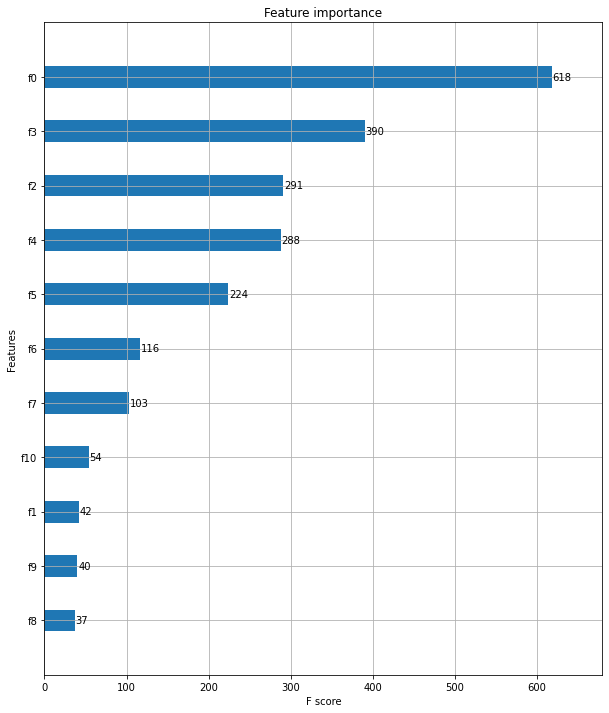

In [ ]:
# xgboost 모델 기준의 특징 중요도 순위
from xgboost import plot_importance
fig, ax = plt.subplots(1, 1, figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax, max_num_features=20, height=0.4)

In [ ]:
print(train_df.columns[0])
print(train_df.columns[3])
print(train_df.columns[2])
print(train_df.columns[4])
print(train_df.columns[5])
print(train_df.columns[6])
print(train_df.columns[7])

나이
몸무게
키
수축기 혈압
이완기 혈압
콜레스테롤
포도당


### 최종 테스트 데이터 예측

In [ ]:
preds_test = xgb_wrapper.predict(test_sc)
pred_proba_test = xgb_wrapper.predict_proba(test_sc)[:,1]

# Binarizer의 threshold 설정값을 0.37로 설정
custom_threshold = 0.37
pred_proba_test_1 = pred_proba_test.reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_test_1)

custom_predict = binarizer.transform(pred_proba_test_1)[:,0]
custom_predict = custom_predict.astype(np.int64)

test_final = pd.DataFrame({"id" : test_index,
                                "pred_prob" : pred_proba_test,
                                "pred_label" : custom_predict})

In [ ]:
test_final["pred_label"].value_counts()
test_final.head(10)

,id,pred_prob,pred_label
0,0,0.366786,0
1,1,0.441276,1
2,2,0.576155,1
3,3,0.820263,1
4,4,0.419377,1
5,5,0.834585,1
6,6,0.856246,1
7,7,0.559086,1
8,8,0.833438,1
9,9,0.051110,0


In [ ]:
test_final.to_csv("unicorn.csv", mode='w', index = False)

In [ ]:
test_result_df = pd.read_csv("unicorn.csv", encoding="utf-8")
test_result_df.head(10)

,id,pred_prob,pred_label
0,0,0.366786,0
1,1,0.441276,1
2,2,0.576155,1
3,3,0.820263,1
4,4,0.419377,1
5,5,0.834585,1
6,6,0.856246,1
7,7,0.559086,1
8,8,0.833438,1
9,9,0.051110,0


# 협업 증빙 및 조원별 프로젝트 기여 내용

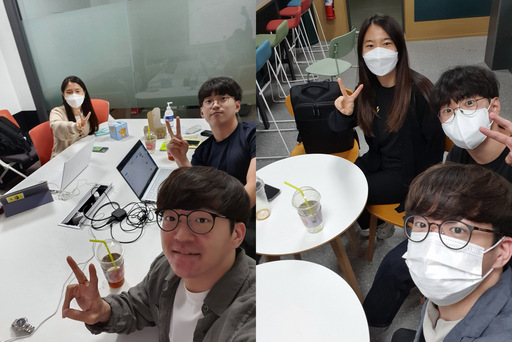



*   문지환(팀장) : 발표, 데이터 전처리(표준화, 샘플링), LightGBM 모델 학습,    XGBoost 모델 학습
*   손수창 : 데이터 전처리(인코딩, 인덱스 제거), k-fold 기반 스태킹 앙상블 학습, XGBoost 모델 학습
*   이지연 : 데이터 전처리(이상값 처리), AdaBoost 모델 학습, *XGBoost* 모델 학습





#감사합니다!